### **Team 2 Group Project**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('data/retail_sales_data.csv')
df.head()

,Date,Product_ID,Product_Name,Category,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count
0,2023-01-01,1001,Product A,Electronics,500,350,20,100
1,2023-01-02,1002,Product B,Electronics,600,400,15,80
2,2023-01-03,1003,Product C,Clothing,50,30,50,200
3,2023-01-04,1004,Product D,Clothing,40,25,80,120
4,2023-01-05,1005,Product E,Home Decor,100,70,30,150


In [3]:
df.describe()

,Product_ID,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1006.500000,235.604167,154.833333,37.333333,106.770833
std,3.488583,218.200546,147.865283,18.983008,38.654079
min,1001.000000,40.000000,25.000000,15.000000,40.000000
25%,1003.750000,57.250000,33.750000,23.500000,80.000000
50%,1006.500000,121.000000,77.500000,31.000000,97.500000
75%,1009.250000,485.000000,312.500000,48.000000,122.500000
max,1012.000000,620.000000,400.000000,80.000000,200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             48 non-null     object
 1   Product_ID       48 non-null     int64 
 2   Product_Name     48 non-null     object
 3   Category         48 non-null     object
 4   Sales_Price      48 non-null     int64 
 5   Cost_Price       48 non-null     int64 
 6   Quantity_Sold    48 non-null     int64 
 7   Inventory_Count  48 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ KB


### **Task 1**
<p>Calculate the total sales revenue for each product category</p>

In [5]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [13]:
df.groupby('Category').sum()

C:\Users\robyn\AppData\Local\Temp\ipykernel_1396\86654594.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').sum()


,Product_ID,Sales_Price,Cost_Price,Quantity_Sold,Inventory_Count
Category,,,,,
Clothing,16104,819,472,963,2165
Electronics,16072,8560,5720,325,1385
Home Decor,16136,1930,1240,504,1575


<p>The total sales revenue for clothing was 819, for electronics was 8560, and for home decor was 1930.

<hr>

### **Task 2**
<p>Create a bar chart to visualize the total sales revenue for each product category
for the entire period.</p>

In [4]:
x = df['Category']
y = df['Sales_Price']

In [27]:
y

0     500
1     600
2      50
3      40
4     100
5     120
6     450
7     550
8      60
9      45
10    110
11    130
12    520
13    610
14     55
15     42
16    105
17    125
18    460
19    540
20     58
21     47
22    115
23    135
24    510
25    590
26     52
27     44
28    102
29    122
30    470
31    560
32     62
33     49
34    120
35    140
36    530
37    620
38     54
39     46
40    108
41    128
42    480
43    570
44     64
45     51
46    125
47    145
Name: Sales_Price, dtype: int64

Text(0, 0.5, 'Revenue (USD)')

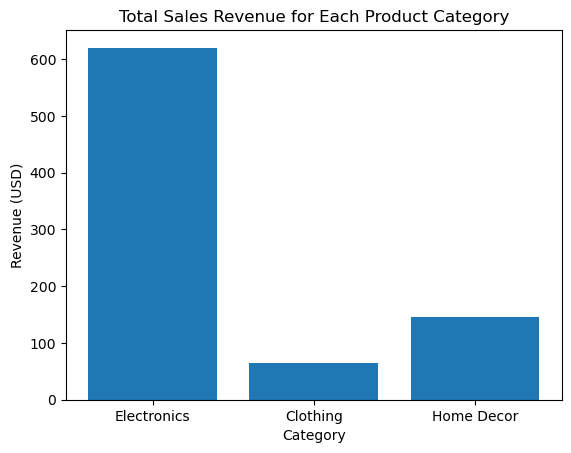

In [9]:
plt.bar(x,y)

plt.title("Total Sales Revenue for Each Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue (USD)")


<hr>

### **Task 3**
<p> Identify the top 5 best-selling products based on the quantity sold </p>

In [11]:
df['Quantity_Sold'].nlargest()

3     80
15    78
27    75
21    72
39    72
Name: Quantity_Sold, dtype: int64

<hr>

### **Task 4**
<p> Create a line chart to visualize the trend of total sales revenue over the four
months </p>

In [12]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [90]:
df2 = df.loc[0:11, ['Sales_Price']]
df2.sum()

Sales_Price    2755
dtype: int64

In [91]:
df3 = df.loc[12:23, ['Sales_Price']]
df3.sum()

Sales_Price    2812
dtype: int64

In [92]:
df4 = df.loc[24:35, ['Sales_Price']]
df4.sum()

Sales_Price    2821
dtype: int64

In [94]:
df5 = df.loc[36:47, ['Sales_Price']]
df5.sum()

Sales_Price    2921
dtype: int64

Text(0, 0.5, 'Sales')

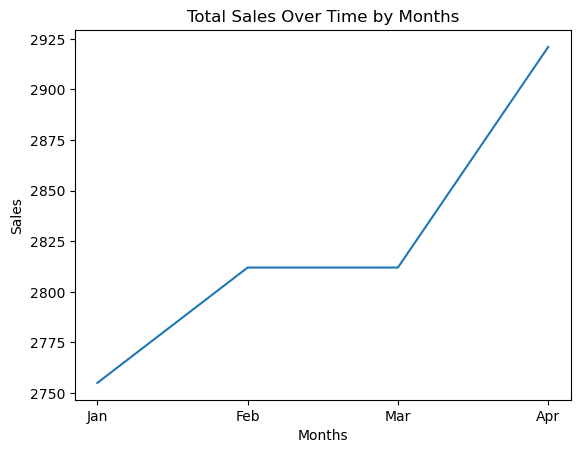

In [98]:
x = ['Jan', 'Feb', 'Mar', 'Apr']
y = [2755, 2812, 2812, 2921]

plt.plot(x,y)

plt.title("Total Sales Over Time by Months")
plt.xlabel("Months")
plt.ylabel("Sales")

<p> Sales increased every month, the largest increase happening between March and April. </p>
<hr>

### **Task 5**
<p> Calculate the profit (sales revenue - cost price) for each product and find the
product with the highest profit. </p>

In [18]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [33]:
x = df['Sales_Price']
y = df['Cost_Price']

In [44]:
df2 = df.drop(columns =['Date', 'Product_ID', 'Category', 'Quantity_Sold', 'Inventory_Count'])

In [45]:
df2.sort_values(by=['Sales_Price', 'Cost_Price'], ascending=False)

,Product_Name,Sales_Price,Cost_Price
37,Product B,620,400
13,Product B,610,400
1,Product B,600,400
25,Product B,590,400
43,Product H,570,380
31,Product H,560,380
7,Product H,550,380
19,Product H,540,380
36,Product A,530,350
12,Product A,520,350


Product B gained the most profit.
<hr>

### **Task 6**
<p> Explore the distribution of sales prices and create a histogram. </p>

In [46]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [47]:
x = df['Sales_Price']

Text(0, 0.5, 'Frequency')

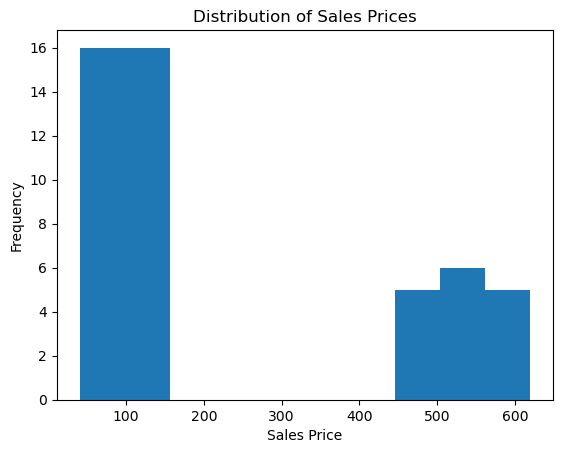

In [49]:
plt.hist(x)

plt.title("Distribution of Sales Prices")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")

<hr>

### **Task 7**
<p> Determine the days with the highest and lowest total sales revenue and visualize
it on a line plot. </p>

In [50]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [111]:
df2= df.drop(columns =['Cost_Price', 'Product_ID', 'Category', 'Quantity_Sold', 'Inventory_Count'])
df3 = df2.sort_values(by=['Sales_Price', 'Date'], ascending=False)
df3.head(1)

,Date,Product_Name,Sales_Price
37,2023-04-02,Product B,620


In [104]:
df3.tail(1)

,Date,Product_Name,Sales_Price
3,2023-01-04,Product D,40


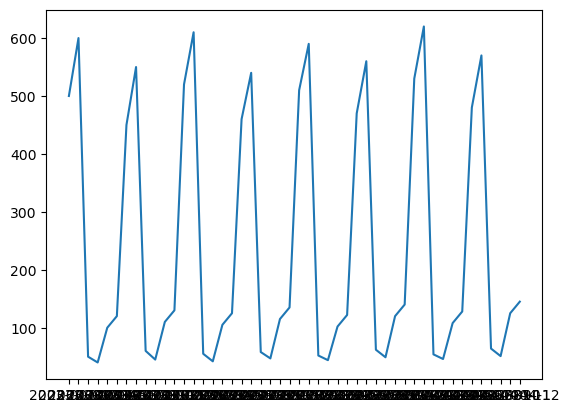

In [109]:
x = df["Date"]
y = df['Sales_Price']
plt.plot(x,y)

<hr>

### **Task 8**
<p> Calculate the total sales revenue for each month and present the results in a line
plot to identify any trends or seasonality. </p>

In [114]:
df2 = df.loc[0:11, ['Sales_Price']]
df2.sum()

Sales_Price    2755
dtype: int64

In [115]:
df3 = df.loc[12:23, ['Sales_Price']]
df3.sum()

Sales_Price    2812
dtype: int64

In [116]:
df4 = df.loc[24:35, ['Sales_Price']]
df4.sum()

Sales_Price    2821
dtype: int64

In [117]:
df5 = df.loc[36:47, ['Sales_Price']]
df5.sum()

Sales_Price    2921
dtype: int64

Text(0, 0.5, 'Sales')

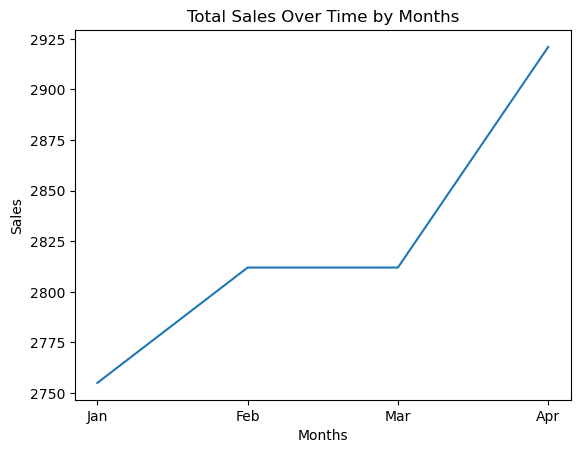

In [118]:
x = ['Jan', 'Feb', 'Mar', 'Apr']
y = [2755, 2812, 2812, 2921]

plt.plot(x,y)

plt.title("Total Sales Over Time by Months")
plt.xlabel("Months")
plt.ylabel("Sales")

<p> As we don't know exactly what these products are, it's hard to determine exactly what made the sales increase, but as it only gets higher going towards April, they might be products for warmer weather, and judging by this graph, it likely either increases or stays the same as it goes on. </p>
<hr>

### **Task 9**
<p> Compute the average sales price for each product category and create a bar
chart to visualize it. </p>

In [120]:
df2= df.drop(columns =['Cost_Price', 'Product_ID', 'Quantity_Sold', 'Inventory_Count'])

In [122]:
df2.groupby('Category').mean()

C:\Users\robyn\AppData\Local\Temp\ipykernel_20096\4162335775.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Category').mean()


,Sales_Price
Category,
Clothing,51.1875
Electronics,535.0000
Home Decor,120.6250


<Axes: xlabel='Category'>

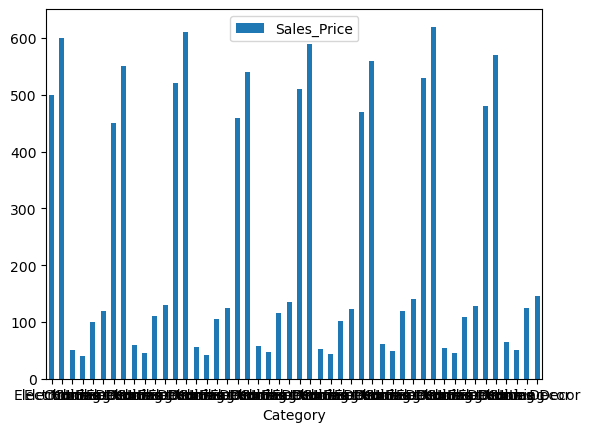

In [123]:
df2.plot.bar(x='Category', y='Sales_Price', rot=0)

<hr>

### **Task 10**
<p> Conduct a correlation analysis to investigate the relationship between sales price
and quantity sold. </p>

In [126]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')

In [127]:
df2= df.drop(columns =['Product_ID', 'Inventory_Count', 'Cost_Price', 'Category'])

In [128]:
df2.corr(method ='pearson')

C:\Users\robyn\AppData\Local\Temp\ipykernel_20096\1747087275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr(method ='pearson')


,Sales_Price,Quantity_Sold
Sales_Price,1.000000,-0.716589
Quantity_Sold,-0.716589,1.000000


<hr>